In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## read in data

In [2]:
raw = pd.read_csv('../dat/adult.test', skiprows=1, header=None, 
                  names=['age', 'workclass', 'fnlwgt', 'education',
                        'education-num', 'marital', 'occupation', 'relationship', 'race',
                        'sex', 'capital-gain', 'capital-loss', 'hours/week', 'native-country', '>50k $/yr'])
raw.head()

,age,workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital-gain,capital-loss,hours/week,native-country,>50k $/yr
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [3]:
raw.shape

(16281, 15)

## column based scrubbing

In [4]:
test = raw.drop('fnlwgt', axis=1)
test.head()

,age,workclass,education,education-num,marital,occupation,relationship,race,sex,capital-gain,capital-loss,hours/week,native-country,>50k $/yr
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
test['education'].unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' Doctorate',
       ' 5th-6th', ' Assoc-voc', ' 9th', ' 12th', ' 1st-4th', ' Preschool'], dtype=object)

In [6]:
ed_dict = {
    ' Bachelors':14,
    ' HS-grad':9,
    ' 11th':7,
    ' Masters':15,
    ' 9th':5,
    ' Some-college':11,
    ' Assoc-acdm':13,
    ' Assoc-voc':12,
    ' 7th-8th':4,
    ' Doctorate':16,
    ' Prof-school':10,
    ' 5th-6th':3,
    ' 10th':6,
    ' 1st-4th':2,
    ' Preschool':1,
    ' 12th':8
}

In [7]:
test['education'].replace(to_replace=list(ed_dict.keys()), value=list(ed_dict.values()), inplace=True)

In [8]:
test.head()

,age,workclass,education,education-num,marital,occupation,relationship,race,sex,capital-gain,capital-loss,hours/week,native-country,>50k $/yr
0,25,Private,7,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,9,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,13,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,11,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,11,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


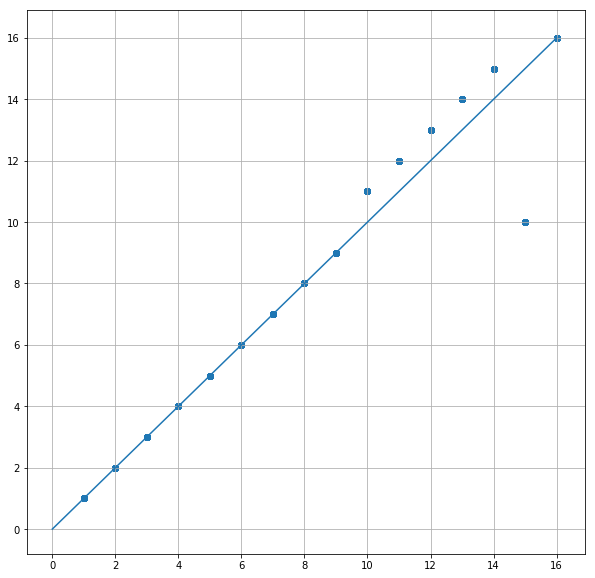

In [9]:
plt.figure(figsize=(10,10))
plt.plot(range(17))
plt.scatter(test['education-num'], test['education'])
plt.grid()
plt.show()

So a few of my education encodings don't match the originals. Why?

In [10]:
raw[test['education-num'] == 15].head()

,age,workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital-gain,capital-loss,hours/week,native-country,>50k $/yr
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
197,42,Self-emp-inc,240628,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States,>50K.
231,38,Private,237943,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
259,72,Self-emp-not-inc,243769,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,1429,20,United-States,<=50K.
357,50,Self-emp-not-inc,165001,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,80,United-States,>50K.


In [11]:
raw[test['education-num'] == 12].head()

,age,workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital-gain,capital-loss,hours/week,native-country,>50k $/yr
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
66,41,Self-emp-inc,445382,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,15024,0,60,United-States,>50K.
135,30,Private,142921,Assoc-acdm,12,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K.
310,56,Local-gov,38573,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,45,United-States,>50K.
358,32,Federal-gov,149573,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,Black,Male,0,0,40,United-States,<=50K.


Okay so it's just a pedagogical difference. We'll keep my encodings, then.

In [12]:
test.drop('education-num', axis=1, inplace=True)
test.head()

,age,workclass,education,marital,occupation,relationship,race,sex,capital-gain,capital-loss,hours/week,native-country,>50k $/yr
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,11,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,11,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [13]:
test['relationship'].unique()

array([' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife',
       ' Other-relative'], dtype=object)

In [14]:
test['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [15]:
temp = test[test['capital-gain'] != 0]
temp.shape

(1323, 13)

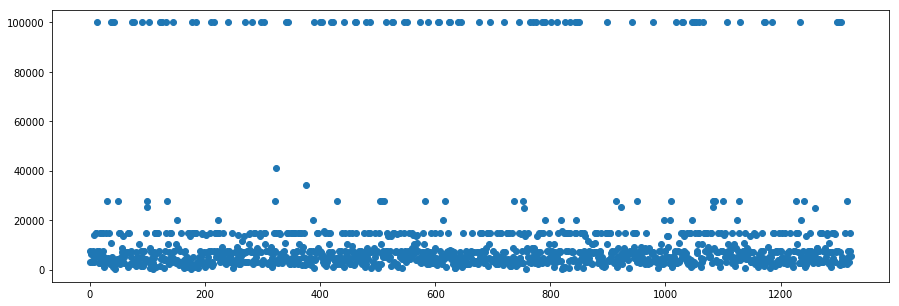

In [16]:
plt.figure(figsize=(15,5))
plt.scatter(range(temp.shape[0]), temp['capital-gain'])
plt.show()

In [17]:
temp = test[test['capital-loss'] != 0]
temp.shape

(763, 13)

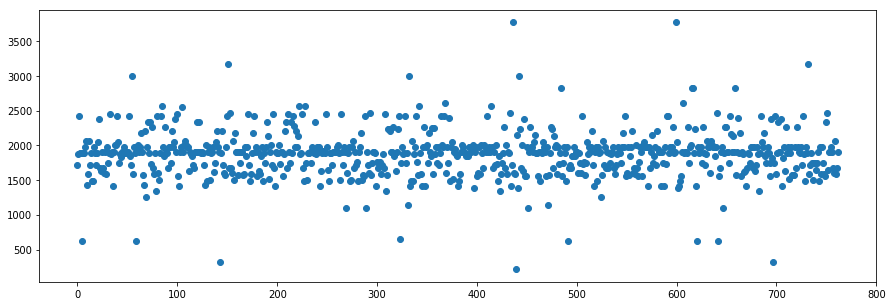

In [18]:
plt.figure(figsize=(15,5))
plt.scatter(range(temp.shape[0]), temp['capital-loss'])
plt.show()

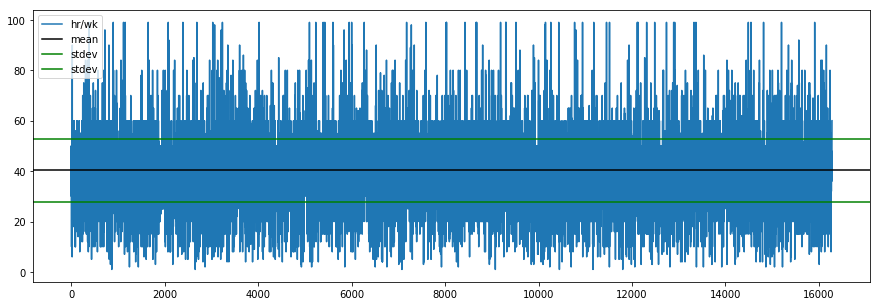

In [19]:
plt.figure(figsize=(15,5))
plt.plot(test['hours/week'], label='hr/wk')
plt.axhline(y=test['hours/week'].mean(), color = 'k', label='mean')
plt.axhline(y=test['hours/week'].mean()-test['hours/week'].std(), color = 'g', label='stdev')
plt.axhline(y=test['hours/week'].mean()+test['hours/week'].std(), color = 'g', label='stdev')
plt.legend()
plt.show()

In [20]:
test['>50k $/yr'].unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [21]:
test['>50k $/yr'].replace(to_replace=[' <=50K.', ' >50K.'], value=[0,1], inplace=True)
test.head()

,age,workclass,education,marital,occupation,relationship,race,sex,capital-gain,capital-loss,hours/week,native-country,>50k $/yr
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,11,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,11,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


## NaN imputation
The nans in this data are encoded as question marks.

In [22]:
print('workclass\n', test['workclass'].unique())
print('occupation\n', test['occupation'].unique())
print('native-country\n', test['native-country'].unique())

workclass
 [' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']
occupation
 [' Machine-op-inspct' ' Farming-fishing' ' Protective-serv' ' ?'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-Forces']
native-country
 [' United-States' ' ?' ' Peru' ' Guatemala' ' Mexico' ' Dominican-Republic'
 ' Ireland' ' Germany' ' Philippines' ' Thailand' ' Haiti' ' El-Salvador'
 ' Puerto-Rico' ' Vietnam' ' South' ' Columbia' ' Japan' ' India'
 ' Cambodia' ' Poland' ' Laos' ' England' ' Cuba' ' Taiwan' ' Italy'
 ' Canada' ' Portugal' ' China' ' Nicaragua' ' Honduras' ' Iran'
 ' Scotland' ' Jamaica' ' Ecuador' ' Yugoslavia' ' Hungary' ' Hong'
 ' Greece' ' Trinadad&Tobago' ' Outlying-US(Guam-USVI-etc)' ' France']


In [23]:
print('workclass has ', 100*test[test['workclass'] == ' ?'].shape[0]/test.shape[0], '% NaNs')
print('occupation has ', 100*test[test['occupation'] == ' ?'].shape[0]/test.shape[0], '% NaNs')
print('native-country has ', 100*test[test['native-country'] == ' ?'].shape[0]/test.shape[0], '% NaNs')

workclass has  5.914870093974572 % NaNs
occupation has  5.933296480560162 % NaNs
native-country has  1.682943308150605 % NaNs


In [24]:
count = 0
ids = []
for i in range(test.shape[0]):
    if (test['workclass'].iloc[i] != ' ?') and (test['occupation'].iloc[i] != ' ?') and (test['native-country'].iloc[i] != ' ?'):
        pass
    else:
        count += 1
        ids.append(i)
print(100 * count/test.shape[0], '% of samples contain NaNs')

7.49953934033536 % of samples contain NaNs


Since there are only a few thousand samples with NaNs I'll just delete 'em. It'd be too much work to build a class based imputer for this experiment.

In [25]:
test.drop(labels=ids, axis=0, inplace=True)

In [26]:
test.shape

(15060, 13)

## are women disproportionately labeled 0?

In [27]:
print(100*test[test['>50k $/yr'] == 1].shape[0]/test.shape[0], '% of people are labeled 1')

24.568393094289508 % of people are labeled 1


In [28]:
print('percentage female:', 100 * test[test['sex'] == ' Female'].shape[0] / test.shape[0])
print('percentage male:', 100 * test[test['sex'] == ' Male'].shape[0] / test.shape[0])

percentage female: 32.622841965471444
percentage male: 67.37715803452855


In [29]:
print(100*test[(test['sex'] == ' Male') & (test['>50k $/yr'] == 1)].shape[0]/test[test['sex'] == ' Male'].shape[0], '% of males are labeled 1')
print(100*test[(test['sex'] == ' Female') & (test['>50k $/yr'] == 1)].shape[0]/test[test['sex'] == ' Female'].shape[0], '% of females are labeled 1')

30.974672316940968 % of males are labeled 1
11.337268471402401 % of females are labeled 1


Yes. Compared to men, women are only getting labeled "1" a third as often.

## one-hot encoding

In [30]:
onehot = pd.get_dummies(test, columns=['workclass', 'marital', 'occupation',
                                       'relationship', 'race', 'sex', 'native-country'])
onehot.head()

,age,education,capital-gain,capital-loss,hours/week,>50k $/yr,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,25,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,13,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,11,7688,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,0,0,30,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## write out

For visualization, let's first write out a dataset without one-hots:

In [31]:
test.to_csv('../dat/clean_categorical.test', index=False)

and then the one-hots

In [32]:
onehot.to_csv('../dat/clean.test', index=False)